In [25]:
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
root_path = paltas.__path__[0][:-7]
import re

In [26]:
root_path

'/Users/padmavenkatraman/Documents/StrongLensing/paltas'

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
config_file = 'config_LSST_catalog'

#### change config file -- add necessary columns

In [17]:
lens = pd.read_csv('data/deflectors.csv', index_col=0)
agn = pd.read_csv('data/sources.csv', index_col=0)

In [18]:
# def phi():
# 	return deflectors.loc[index,'PHIE']* np.pi / 180
# def q_mass():
# 	return 1/ (1 - deflectors.loc[index,'ELLIP'])
# def q_light():
# 	return (1 - deflectors.loc[index,'ellipticity_true'])/(1 + deflectors.loc[index,'ellipticity_true'])
# def q_source_light():	
# 	return 1 - sources.loc[index,'ellipticity_true']

# 'cross_object':{
# 	'parameters':{
# 		('main_deflector:e1,main_deflector:e2'):[dist.EllipticitiesTranslation, q_mass, phi],
# 		('main_deflector:gamma1,main_deflector:gamma2'):[dist.ExternalShearTranslation, 'GAMMA','PHIG'],
# 		('lens_light:e1,lens_light:e2'): [dist.EllipticitiesTranslation, q_light, phi],
# 		('source:e1,source:e2'): [dist.EllipticitiesTranslation, q_source_light, 'phi']
# 	}
# },

# e1 = (1 - q)/(1+q) * np.cos(2*phi)
# e2 = (1 - q)/(1+q) * np.sin(2*phi)

# gamma1 = gamma * np.cos(2*phi)
# gamma2 = gamma * np.sin(2*phi)

In [19]:


# # Lens
# qmasslens= 1/ (1 - lens['ELLIP'])
# phimasslens = lens['PHIE'] * np.pi/180
# lens = lens.assign(e1_mass=(1 - qmasslens)/(1+qmasslens) * np.cos(2*phimasslens))
# lens = lens.assign(e2_mass=(1 - qmasslens)/(1+qmasslens) * np.sin(2*phimasslens))

# qlightlens = (1 - lens['ellipticity_true'])/(1 + lens['ellipticity_true'])
# philightlens = phimasslens

# gamma = lens['GAMMA']
# phig = lens['PHIG'] * np.pi/180


# lens = lens.assign(e1_light=(1 - qlightlens)/(1+qlightlens) * np.cos(2*philightlens))
# lens = lens.assign(e2_light=(1 - qlightlens)/(1+qlightlens) * np.sin(2*philightlens))
# lens = lens.assign(gamma1 = gamma*np.cos(2*phig))
# lens = lens.assign(gamma2 = gamma*np.sin(2*phig))
# # source

# qagn = (1 - agn['ellipticity_true'])/(1 + agn['ellipticity_true'])
# phiagn = agn['phi']


# agn = agn.assign(e1_light=(1 - qagn)/(1+qagn) * np.cos(2*phiagn))
# agn = agn.assign(e2_light=(1 - qagn)/(1+qagn) * np.sin(2*phiagn))

In [20]:
# agn.to_csv("data/sources.csv")
# lens.to_csv("data/deflectors.csv")

In [23]:

from paltas.Configs.config_handler import ConfigHandler

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,f'{config_file}.py'))
config_handler.index = 7

# First let's get the lenstronomy model lists, kwargs lists, and redshift lists.
kwargs_model, kwargs_params = config_handler.get_lenstronomy_models_kwargs(new_sample=False)

# # We can see what keys are returned, and inspect the lens models in particular
# print('Available Keys:')
# print(kwargs_model.keys())

# print(kwargs_params.keys())
# print('')

# print('lens_model_list')
# print(kwargs_model['lens_model_list'])
# print('kwargs_lens')
# print(kwargs_params['kwargs_lens'])
img401, dict401 = config_handler.draw_image(new_sample=False)

here! 7
{'compute_time_delays': False, 'mag_app': 24.45, 'output_ab_zeropoint': 27, 'x_point_source': 0.001668022, 'y_point_source': 0.1348162, 'z_point_source': 2.92, 'z_source': 2.8909001} ('x_point_source', 'y_point_source', 'output_ab_zeropoint', 'compute_time_delays', 'z_point_source')
kwargs_model:  {'lens_model_list': ['EPL_NUMBA', 'SHEAR'], 'lens_redshift_list': [0.288, 0.288], 'lens_light_model_list': ['SERSIC_ELLIPSE'], 'point_source_model_list': ['SOURCE_POSITION'], 'source_light_model_list': ['SERSIC_ELLIPSE'], 'source_redshift_list': [2.8909001], 'multi_plane': False, 'z_source': 2.8909001, 'z_source_convention': 2.8909001}
kwargs_params:  {'kwargs_lens': [{'theta_E': 1.2867780357033276, 'gamma': 2, 'e1': -0.0096412334767852, 'e2': -0.2049893071605179, 'center_x': 0, 'center_y': 0}, {'gamma1': 0.0061257626863061, 'gamma2': -0.0329730928494, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_lens_light': [{'R_sersic': 0.73001415, 'center_x': 0, 'center_y': 0, 'e1': 0.0154690219556061, 'e

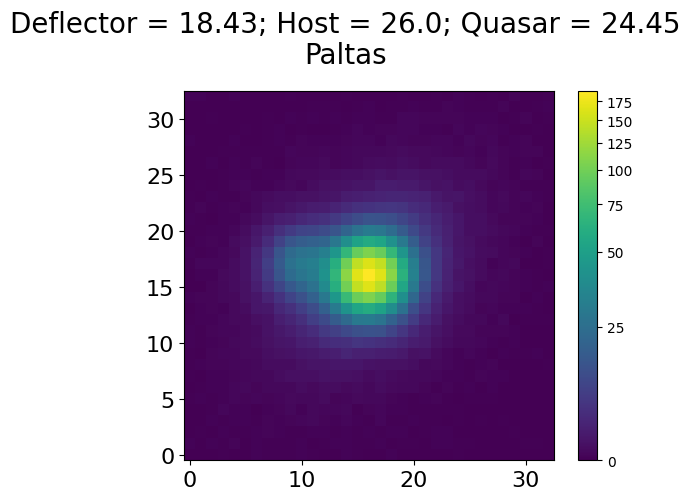

In [24]:
fig, ax = plt.subplots()
ax_pix = ax.imshow(img401, norm=simple_norm(img401, stretch="asinh", min_cut=1e-16, asinh_a=0.1), origin='lower');
cbar = fig.colorbar(ax_pix, fraction=0.046)
cbar.ax.tick_params(labelsize=10)
plt.suptitle(
    f'Deflector = {np.round(dict401["lens_light_parameters_mag_app"],2)}; Host = {np.round(dict401["source_parameters_mag_app"],2)}; Quasar = {dict401["point_source_parameters_mag_app"]}\nPaltas',
    y=1.05,
);

In [12]:
dict401

{'main_deflector_parameters_center_x': 0,
 'main_deflector_parameters_center_y': 0,
 'main_deflector_parameters_dec_0': 0.0,
 'main_deflector_parameters_e1': 0.0791100595795193,
 'main_deflector_parameters_e2': -0.110865641123596,
 'main_deflector_parameters_gamma': 2,
 'main_deflector_parameters_gamma1': -0.1070143318987866,
 'main_deflector_parameters_gamma2': -0.0150927981440268,
 'main_deflector_parameters_ra_0': 0.0,
 'main_deflector_parameters_theta_E': 0.6719367398544195,
 'main_deflector_parameters_z_lens': 0.144,
 'source_parameters_R_sersic': 1.0071628,
 'source_parameters_center_x': 0.1273427,
 'source_parameters_center_y': 0.04637452,
 'source_parameters_e1': 0.0044209996080733,
 'source_parameters_e2': 0.0024086860133642,
 'source_parameters_mag_app': 22.49274,
 'source_parameters_n_sersic': 4.0,
 'source_parameters_output_ab_zeropoint': 27,
 'source_parameters_z_source': 1.5917828,
 'lens_light_parameters_R_sersic': 1.4456719,
 'lens_light_parameters_center_x': 0,
 'lens_

In [12]:
# list_results = []
# for i in range(3):
#     config_handler.draw_new_sample()
#     sample = config_handler.sample
#     list_results.append(sample)

In [13]:
os.system(command = f'python3 ../paltas/generate.py {config_file}.py generated_images/om10/{config_file} --n 1 --tf_record')


/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Save folder path: generated_images/om10/config_LSST_catalog
here! 401
{'compute_time_delays': False, 'mag_app': 21.45, 'output_ab_zeropoint': 27, 'x_point_source': 0.7952452, 'y_point_source': -0.4164698, 'z_point_source': 2.39, 'z_source': 2.3467846} ('x_point_source', 'y_point_source', 'output_ab_zeropoint', 'compute_time_delays', 'z_point_source')


  0%|          | 0/1 [00:00<?, ?it/s]

here! 401
kwargs_model:  {'lens_model_list': ['EPL_NUMBA', 'SHEAR'], 'lens_redshift_list': [0.478, 0.478], 'lens_light_model_list': ['SERSIC_ELLIPSE'], 'point_source_model_list': ['SOURCE_POSITION'], 'source_light_model_list': ['SERSIC_ELLIPSE'], 'source_redshift_list': [2.3467846], 'multi_plane': False, 'z_source': 2.3467846, 'z_source_convention': 2.3467846}
kwargs_params:  {'kwargs_lens': [{'theta_E': 1.165897431928425, 'gamma': 2, 'e1': 0.0184897848420481, 'e2': -0.0413952799225546, 'center_x': 0, 'center_y': 0}, {'gamma1': -0.0482579997249181, 'gamma2': -0.0340332432959217, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_lens_light': [{'R_sersic': 0.9856105, 'center_x': 0, 'center_y': 0, 'e1': -0.0303183002651838, 'e2': 0.0678771839139652, 'n_sersic': 4.0, 'amp': 39.337731158487465}], 'kwargs_ps': [{'ra_source': 0.7952452, 'dec_source': -0.4164698, 'source_amp': 165.95869074375614}], 'kwargs_source': [{'R_sersic': 0.29780316, 'center_x': 0.7952452, 'center_y': -0.4164698, 'e1': 0.02147303540

/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Configs/config_handler.py:366: RuntimeWarning: Parameter (psf_parameters, kernel_point_source) in config_dict, and possibly others, will not be written to metadata.csv
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 1049.10it/s]


0

In [193]:
# psf_kernels = np.load('data/norm_resize_psf.npy', mmap_mode='r+')
# random_psf_index = np.random.randint(psf_kernels.shape[0])

# psf_kernels.shape


In [194]:
# mask = psf_kernels[:, ...]<0
# mask


In [195]:
# psf_kernels_copy = psf_kernels.copy()
# psf_kernels_copy[mask] =0

### psf gallery -- how do kernel psfs differ from gaussian?

In [196]:
# np.save(file='data/norm_resize_psf_no_zero.npy', arr=psf_kernels_copy)

In [159]:
# # a gallery of psfs
# fig,ax=plt.subplots(2, 5, figsize=(14, 5))
# ax=ax.flatten()
# for i in range(1,11):
#     ax[i-1].imshow(psf_kernels_copy[0, :, :], norm=colors.AsinhNorm(linear_width=i/10))
#     ax[i-1].axis('off')


In [14]:
file_list = [os.path.join(f'generated_images/om10/{config_file}', i) for i in os.listdir(f'generated_images/om10/{config_file}')]
img_list = [i for i in file_list if i[-3:] =='npy']
img_list

['generated_images/om10/config_LSST_catalog/image_0000000.npy']

In [15]:
from astropy.visualization import simple_norm



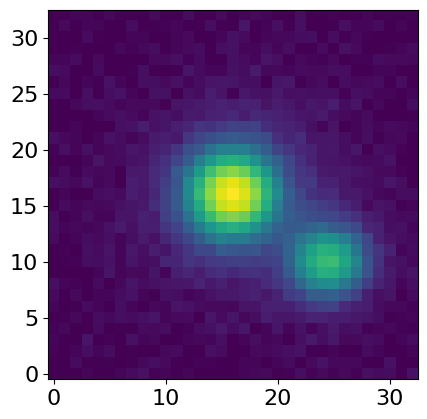

In [20]:
img = np.load(img_list[0])
plt.imshow(img, norm=simple_norm(img, stretch="asinh", min_cut=1e-16, asinh_a=0.1), origin='lower')

In [37]:
# # indices = [1750, 2248, 401, 1939, 1939, 1066, 2453, 1959,743,2685,438]
# for j in [1, 5, 10, 20, 40, 60]:
#     fig,ax=plt.subplots(2, 5, figsize=(24, 10))
#     ax=ax.flatten()
#     for i in range(10):
#         ax[i].imshow(np.load(img_list[i]), norm=colors.AsinhNorm(linear_width=j))
#         ax[i].axis('off');
#         # ax[i].set_title(indices[i])
#     fig.suptitle(f'asinh stretch = {j}')
#     plt.show()

In [18]:
df = pd.read_csv('generated_images/om10/config_LSST_catalog/metadata.csv')

In [19]:
df.iloc[0, 9:]

lens_light_parameters_R_sersic                        0.98561
lens_light_parameters_center_x                              0
lens_light_parameters_center_y                              0
lens_light_parameters_e1                            -0.030318
lens_light_parameters_e2                             0.067877
lens_light_parameters_mag_app                       19.656071
lens_light_parameters_n_sersic                            4.0
lens_light_parameters_output_ab_zeropoint                  27
lens_light_parameters_z_source                           2.39
main_deflector_parameters_center_x                          0
main_deflector_parameters_center_y                          0
main_deflector_parameters_dec_0                           0.0
main_deflector_parameters_e1                          0.01849
main_deflector_parameters_e2                        -0.041395
main_deflector_parameters_gamma                             2
main_deflector_parameters_gamma1                    -0.048258
main_def